In [187]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Double DQN
## Total frames: 10e7

In [188]:
ddq_test_score = pd.read_csv('./ddq_results/run-20220402_153741_BreakoutNoFrameskip-v4_summary-tag-Test score.csv')
ddq_loss = pd.read_csv('./ddq_results/run-20220402_153741_BreakoutNoFrameskip-v4_summary-tag-Loss.csv')
ddq_q = pd.read_csv('./ddq_results/run-20220402_153741_BreakoutNoFrameskip-v4_summary-tag-Average Q.csv')
ddq_reward = pd.read_csv('./ddq_results/run-20220402_153741_BreakoutNoFrameskip-v4_summary-tag-Latest 100 avg reward (clipped).csv')
ddq_frames = pd.read_csv('./ddq_results/run-20220402_153741_BreakoutNoFrameskip-v4_summary-tag-Total Frames.csv')

## Test Score of DDQN

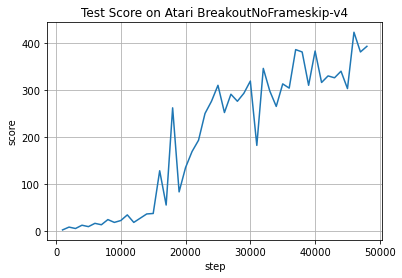

In [189]:
# Data for plotting
t = ddq_test_score.Step
s = ddq_test_score.Value

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='step', ylabel='score',
       title='Test Score on Atari BreakoutNoFrameskip-v4')
ax.grid()

fig.savefig("test.png")
plt.show()

## Training Loss of DDQN

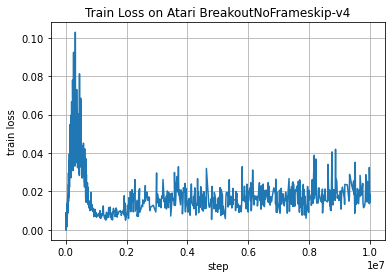

In [190]:
# Data for plotting
t = ddq_frames.Value
s = ddq_loss.Value

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='step', ylabel='train loss',
       title='Train Loss on Atari BreakoutNoFrameskip-v4')
ax.grid()

fig.savefig("test.png")
plt.show()

## Reward of DDQN

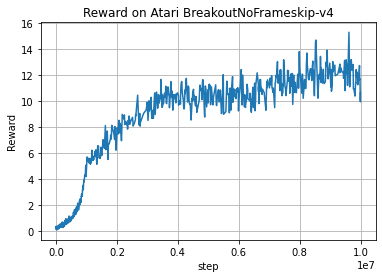

In [191]:
# Data for plotting
t = ddq_frames.Value
s = ddq_reward.Value

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='step', ylabel='Reward',
       title='Reward on Atari BreakoutNoFrameskip-v4')
ax.grid()

fig.savefig("test.png")
plt.show()


## Q value of DDQN

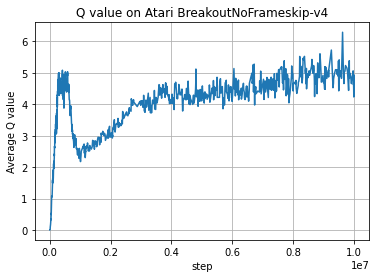

In [192]:
# Data for plotting
t = ddq_frames.Value
s = ddq_q.Value

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='step', ylabel='Average Q value',
       title='Q value on Atari BreakoutNoFrameskip-v4')
ax.grid()

fig.savefig("test.png")
plt.show()

# Decision Transformer

In [193]:
import json

with open("./decision_results/record_400000.json") as f:
    decision_data = json.load(f)
    f.close()

In [194]:
decision_loss = []
decision_step = []
for data in decision_data['train']:
    if data['epoch'] == 4:
        decision_loss.append(data['train_loss'])
        decision_step.append(data['iter'])

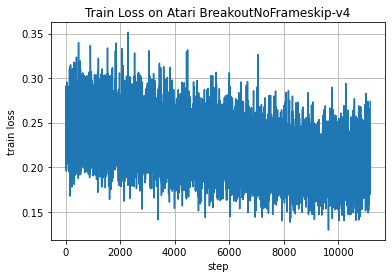

In [195]:
# Data for plotting
t = decision_step
s = decision_loss

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='step', ylabel='train loss',
       title='Train Loss on Atari BreakoutNoFrameskip-v4')
ax.grid()

fig.savefig("test.png")
plt.show()

In [196]:
decision_score = decision_data['eval']

In [197]:
decision_score

[{'target_return': 90, 'eval_return': 54.8},
 {'target_return': 90, 'eval_return': 48.1},
 {'target_return': 90, 'eval_return': 49.5},
 {'target_return': 90, 'eval_return': 75.1},
 {'target_return': 90, 'eval_return': 67.8}]

# Muzero

In [198]:
muzero_reward = pd.read_csv('./muzero_results/25simulation-133000trainingsteps/run-breakout_2022-04-06--02-16-33--25-133000-tag-1.Total_reward_1.Total_reward.csv')
muzero_loss = pd.read_csv('./muzero_results/25simulation-133000trainingsteps/run-breakout_2022-04-06--02-16-33--25-133000-tag-3.Loss_Value_loss.csv')
muzero_steps = pd.read_csv('./muzero_results/25simulation-133000trainingsteps/run-breakout_2022-04-06--02-16-33--25-133000-tag-2.Workers_2.Training_steps.csv')

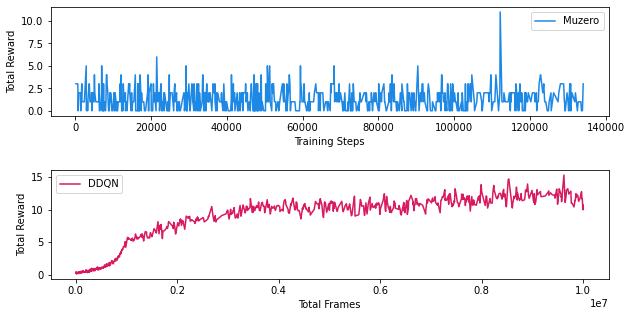

In [199]:
# Data for plotting
fig, axs = plt.subplots(2, 1, figsize=(10,5))
fig.subplots_adjust(hspace=0.5)
x = muzero_steps.Value
y = muzero_reward.Value

z = ddq_frames.Value
w = ddq_reward.Value

# Using set_dashes() to modify dashing of an existing line
axs[0].plot(x, y, label='Muzero', color='#1E88E5')

axs[1].plot(z, w, label='DDQN', color='#D81B60')
# ax.set_xlim([0,50000])
# ax.set_ylim([0,13])
axs[0].set(xlabel='Training Steps', ylabel='Total Reward')
axs[1].set(xlabel='Total Frames', ylabel='Total Reward')
axs[0].legend()
axs[1].legend()
plt.show()

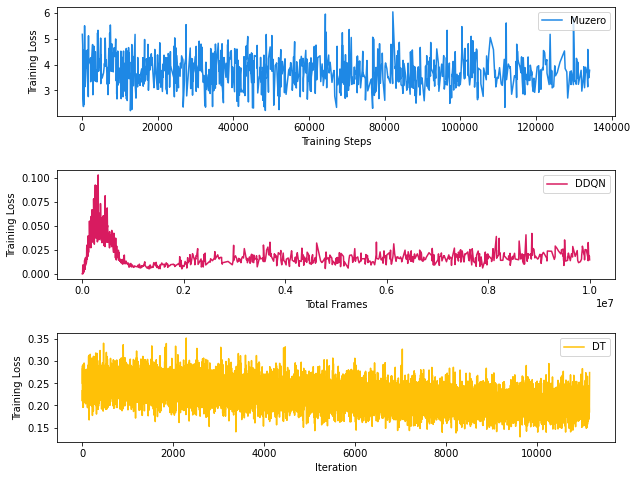

In [200]:
x = muzero_steps.Value
y = muzero_loss.Value

z = ddq_frames.Value
w = ddq_loss.Value

fig, axs = plt.subplots(3, 1, figsize=(10,8))
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0.5)

# Plot each graph, and manually set the y tick values
axs[0].plot(x, y, color='#1E88E5', label='Muzero')

axs[1].plot(z, w, color='#D81B60', label='DDQN')

axs[2].plot(decision_step, decision_loss, color='#FFC107', label='DT')

axs[0].set(ylabel='Training Loss', xlabel='Training Steps')
axs[1].set(ylabel='Training Loss', xlabel='Total Frames')
axs[2].set(ylabel='Training Loss',xlabel='Iteration')
axs[0].legend()
axs[1].legend()
axs[2].legend()
plt.show()